In [1]:
import subprocess as subp
from math import sqrt
from time import monotonic
from pathlib import Path

# adjust this to your CRMC path 
crmc_path = "../../crmc/build"

crmc_path = Path(crmc_path)
assert crmc_path.exists()

timing = {}

models = ("EposLHC", "SIBYLL-2.3d", "QGSJet-II-04")
energies = [100, 1000, 10000]  # GeV

outfile = "/dev/null"
for model in models:
    times_crmc = []
    times_chromo = []
    for energy in energies:
        nevent = int(5e3 / sqrt(energy))
        if model != "EposLHC":
            nevent *= 10
        t = monotonic()
        subp.check_call(["python", "-m", "chromo", "-m", model, "-S", f"{energy}", "-n", f"{nevent}", "-f", outfile])
        times_chromo.append(nevent / (monotonic() - t))
        t = monotonic()
        model2 = {
            "EposLHC": "0",
            "SIBYLL-2.3d": "6",
            "QGSJet-II-04": "7",
        }[model]
        subp.check_call(["bin/crmc", "-m", model2, "-S", f"{energy}", "-n", f"{nevent}", "-f", outfile], cwd=crmc_path)
        times_crmc.append(nevent / (monotonic() - t))
    timing[model] = (times_chromo, times_crmc)

[]

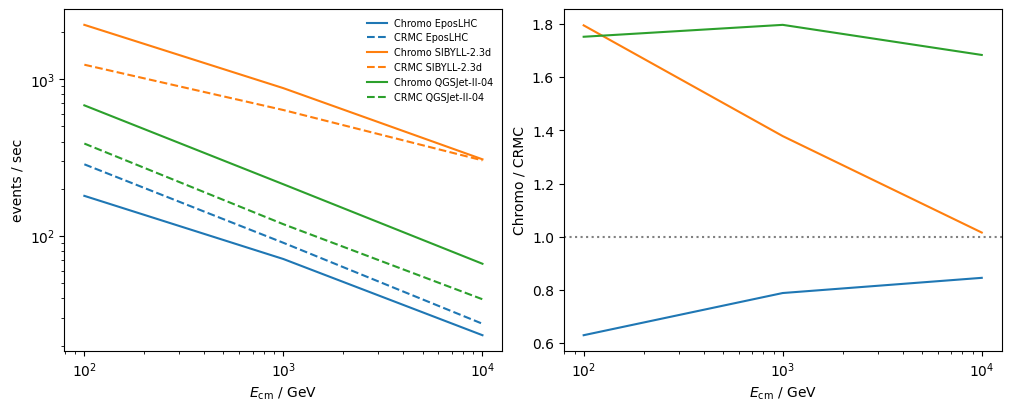

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10, 4), constrained_layout=True)
for model, (times_chromo, times_crmc) in timing.items():
    plt.sca(ax[0])
    l = plt.plot(energies, times_chromo, label=f"Chromo {model}")[0]
    plt.plot(energies, times_crmc, label=f"CRMC {model}", color=l.get_color(), ls="--")
    plt.sca(ax[1])
    plt.plot(energies, np.divide(times_chromo, times_crmc), color=l.get_color())
plt.sca(ax[0])
plt.xlabel("$E_\\mathrm{cm}$ / GeV")
plt.ylabel("events / sec")
plt.loglog()
plt.legend(frameon=False, fontsize="x-small");
plt.sca(ax[1])
plt.axhline(1, ls=":", color="0.5")
plt.xlabel("$E_\\mathrm{cm}$ / GeV")
plt.ylabel("Chromo / CRMC")
plt.semilogx()
